In [4]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)

2.6.0


In [10]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load Pretrained ResNet Model
resnet = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # Remove final classification layer
resnet = resnet.to(device)
resnet.eval()

Using device: cpu


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [11]:
# Define Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and Preprocess Image
image_path = "../../data/frames_per_phase/0002_21/1 arm placing/frame_2169.jpg"
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

Extracted Feature Shape: (1, 2048)


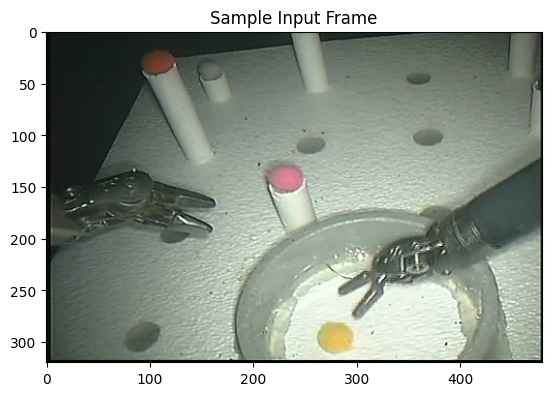

In [ ]:
# Extract Features
with torch.no_grad():
    features = resnet(input_tensor)
    
# Flatten to remove dimensions
features = features.view(features.shape[0], -1)

# Convert to NumPy Array for Analysis
features_np = features.cpu().numpy()
print("Extracted Feature Shape:", features_np.shape)

# Visualizing the Image
plt.imshow(np.array(image))
plt.title("Sample Input Frame")
plt.axis("off")
plt.show()